# Practice Exercise 

# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 16 - Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
#Import all the necessary modules
# To enable plotting graphs in Jupyter notebook

%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import zscore # Helps me normalize the numerical columns
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

dt=pd.read_csv("insurance.csv")

dt.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [2]:
dt.sample(10)

,age,sex,bmi,children,smoker,region,charges
710,18,male,35.200,1,no,southeast,1727.54000
467,56,female,33.820,2,no,northwest,12643.37780
933,45,female,35.300,0,no,southwest,7348.14200
894,62,male,32.110,0,no,northeast,13555.00490
560,46,female,19.950,2,no,northwest,9193.83850
684,33,female,18.500,1,no,southwest,4766.02200
1097,22,male,33.770,0,no,southeast,1674.63230
513,19,male,30.400,0,no,southwest,1256.29900
809,25,male,25.840,1,no,northeast,3309.79260
1145,52,male,32.775,3,no,northwest,11289.10925


# Question 17 - Check the distribution of expenses(charges) and state your insights.

In [3]:
dt.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [4]:
# Note: Number of smokers in the data is significantly lower than number of non smokers. so the results will be skewed towards 
#       non smokers. 

In [5]:
dt.groupby(['sex','smoker','region']).count()

age  bmi  children  charges
sex    smoker region                                
female no     northeast  132  132       132      132
              northwest  135  135       135      135
              southeast  139  139       139      139
              southwest  141  141       141      141
       yes    northeast   29   29        29       29
              northwest   29   29        29       29
              southeast   36   36        36       36
              southwest   21   21        21       21
male   no     northeast  125  125       125      125
              northwest  132  132       132      132
              southeast  134  134       134      134
              southwest  126  126       126      126
       yes    northeast   38   38        38       38
              northwest   29   29        29       29
              southeast   55   55        55       55
              southwest   37   37        37       37

In [6]:
#Note: Number of female and male non smokers are evenly distributed across regions but smokers on the other hand are more from
#      south east than any other regions across sexes, which in case of males becomes almost double that of the least smoking 
#      males i.e., male smokers from northwest.

In [7]:
dt.groupby(['children','smoker']).count()

age  sex  bmi  region  charges
children smoker                                
0        no      459  459  459     459      459
         yes     115  115  115     115      115
1        no      263  263  263     263      263
         yes      61   61   61      61       61
2        no      185  185  185     185      185
         yes      55   55   55      55       55
3        no      118  118  118     118      118
         yes      39   39   39      39       39
4        no       22   22   22      22       22
         yes       3    3    3       3        3
5        no       17   17   17      17       17
         yes       1    1    1       1        1

In [8]:
#Note: number of smokers / total  for each of the children catogory decreases when compared between 0& 1 but increases when we 
#      go further along until children of 3 numbers before decreasing afterwards.

In [9]:
dt.groupby(['charges','smoker']).count()

,,age,sex,bmi,children,region
charges,smoker,,,,,
1121.87390,no,1,1,1,1,1
1131.50660,no,1,1,1,1,1
1135.94070,no,1,1,1,1,1
1136.39940,no,1,1,1,1,1
1137.01100,no,1,1,1,1,1
1137.46970,no,1,1,1,1,1
1141.44510,no,1,1,1,1,1
1146.79660,no,1,1,1,1,1
1149.39590,no,1,1,1,1,1


In [10]:
# Note: Charges of insurance for non smokers is lesser than smokers.

# Question 18 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [11]:
dt['age'].corr(dt['bmi'])

0.1092718815485352

In [12]:
dt1 = pd.get_dummies(dt, columns=['smoker'])

In [13]:
dt1.sample(10)

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
937,39,female,24.225,5,northwest,8965.79575,1,0
824,60,male,24.320,0,northwest,12523.60480,1,0
7,37,female,27.740,3,northwest,7281.50560,1,0
584,19,male,20.700,0,southwest,1242.81600,1,0
1186,20,male,35.625,3,northwest,37465.34375,0,1
556,46,male,33.440,1,northeast,8334.58960,1,0
784,31,female,29.260,1,southeast,4350.51440,1,0
204,46,male,22.300,0,southwest,7147.10500,1,0
23,34,female,31.920,1,northeast,37701.87680,0,1
918,61,female,28.200,0,southwest,13041.92100,1,0


In [14]:
dt1['smoker_yes'].corr(dt['charges'])

0.7872514304984771

In [15]:
# There is high correlation between charges of insurance and whether a person smokes or not.

# Question 19 - Visualize the relationship among various variables/features. 

You can use pairplot function and create a scatterplot matrix to do so.

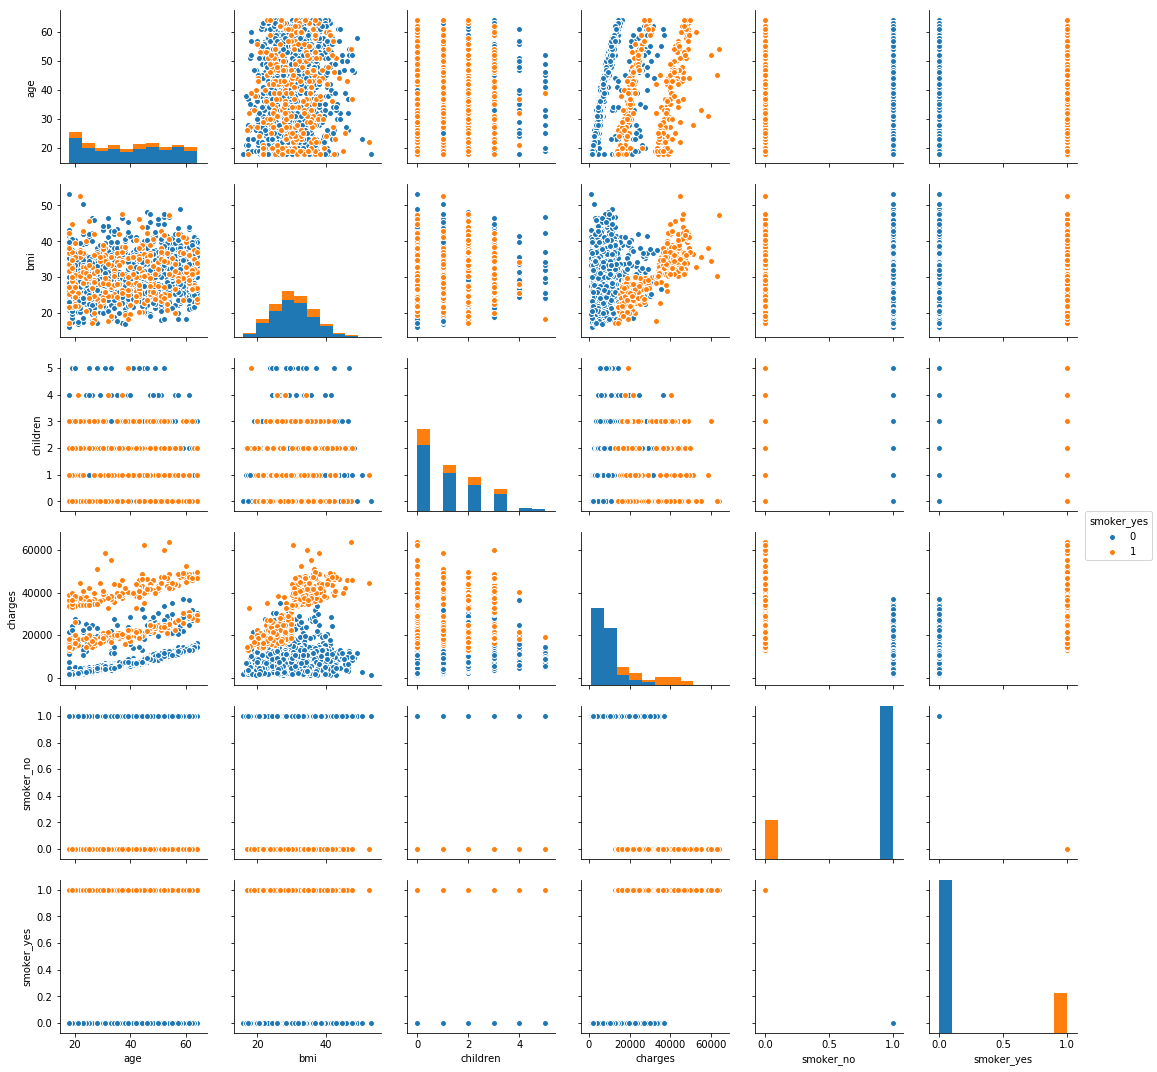

In [16]:
sns.pairplot( dt1 , kind='scatter', hue='smoker_yes' );

# Question 20 - Get the train and test data from your dataset.

In [17]:
X = dt.drop('charges', axis=1)

y = dt[['charges']]


# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Question 21 - Create the dummies for the categorical variables/features.

You can use pd.get_dummies() function to do so.

In [18]:
X_train = pd.get_dummies(X_train, columns=['smoker'])

In [19]:
X_train = pd.get_dummies(X_train, columns=['sex'])

In [26]:
X_train = pd.get_dummies(X_train, columns=['region'])

In [39]:
X_train = X_train.drop({'smoker_no', 'sex_male' ,'children'}, axis=1)
X_train.sample(5)

,age,bmi,smoker_yes,sex_female,region_northeast,region_northwest,region_southeast,region_southwest
922,38,31.000,0,0,0,0,0,1
743,31,26.620,0,1,0,0,1,0
937,39,24.225,0,1,0,1,0,0
1052,49,29.830,0,0,1,0,0,0
212,24,28.500,0,0,0,1,0,0


In [21]:
X_test = pd.get_dummies(X_test, columns=['smoker'])

In [36]:
X_test = pd.get_dummies(X_test, columns=['sex'])

In [24]:
X_test = pd.get_dummies(X_test, columns=['region'])

In [40]:
X_test = X_test.drop({'smoker_no', 'sex_male' ,'children'}, axis=1)
X_test.sample(5)


,age,bmi,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female
769,38,19.475,0,0,1,0,0,1
484,48,34.300,0,0,0,0,1,0
321,26,29.640,0,1,0,0,0,1
1268,20,33.300,0,0,0,0,1,1
62,64,24.700,0,0,1,0,0,0


# Question 22 - Train your model.

In [41]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 23 - Fit your model and get the summary of model.

In [42]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 252.12574330262458
The coefficient for bmi is 322.4470571303171
The coefficient for smoker_yes is 24055.06216073812
The coefficient for sex_female is 267.5248228211308
The coefficient for region_northeast is 501.8640938822245
The coefficient for region_northwest is 258.6226516903443
The coefficient for region_southeast is -446.6350073512285
The coefficient for region_southwest is -313.8517382213265


In [43]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11479.003738847388


# Question 24 - Predict the charges and evaluate the model performance. ( 1 point)

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [44]:
regression_model.score(X_train, y_train)

0.7533671165903997

In [45]:
regression_model.score(X_test, y_test)

0.7359469637300224

# Question 25 - What are some ideas to improve your model performance? 

It is a subjective question, you are not expected to give code and output in this last question.
Just think of the ways which can be helpful in improving your model performance.

In [ ]:
# We should assortment of models which we can combine for better results